In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from bs4 import BeautifulSoup
import re
import schedule
import time

In [12]:
# This function is used to graph and chart the stock data
def chart(stock_name):
    #Load the Data
    df = pd.read_csv(f'{stock_name}.csv')
    
    #Create a simple moving average with a 30 day window
    SMA_30 = pd.DataFrame()
    SMA_30['Adj_Close_Price'] = df['Adj Close'].rolling(window = 30).mean()
    SMA_30
    
    # Short moving average for 100 days
    SMA_100 = pd.DataFrame()
    SMA_100['Adj_close_price'] = df['Adj Close'].rolling(window = 100).mean()
    SMA_100
    
    # Create a dataframe of all adj close prices
    data = pd.DataFrame()
    data['Date'] = df['Date']
    data['AAL_adj_close'] = df['Adj Close']
    data['SMA_30'] = SMA_30['Adj_Close_Price']
    data['SMA_100']= SMA_100['Adj_close_price']
    
    #Create a Function to signal when to buy and sell
    def buy_sell(data):
        sig_price_buy = []
        sig_price_sell = []
        flag = -1

        for i in range(len(data)):
            if data['SMA_30'][i] > data['SMA_100'][i]:
                if flag != 1:
                    sig_price_buy.append(data['AAL_adj_close'][i])
                    sig_price_sell.append(np.nan)
                    flag = 1
                else:
                    sig_price_buy.append(np.nan)
                    sig_price_sell.append(np.nan)
            elif data['SMA_30'][i] < data['SMA_100'][i]:
                if flag !=0:
                    sig_price_buy.append(np.nan)
                    sig_price_sell.append(data['AAL_adj_close'][i])
                    flag = 0
                else:
                    sig_price_buy.append(np.nan)
                    sig_price_sell.append(np.nan)
            else:
                sig_price_buy.append(np.nan)
                sig_price_sell.append(np.nan)

        return (sig_price_buy, sig_price_sell)
    
    #store the buy and sell data into a variable
    buy_sell = buy_sell(data)
    data['buy_signal_price'] = buy_sell[0]
    data['sell_signal_price']=buy_sell[1]
    
    #Looking for the dates of the buy signals
    buy_dates = data.loc[data['buy_signal_price']>0]
    
    #Looking for the dates of the sell signals
    sell_dates = data.loc[data['sell_signal_price']>0]
    
    #Dropping uneccessary columns
    buy_dates.drop(columns = ['sell_signal_price', 'SMA_30', 'SMA_100'], inplace = True)
    sell_dates.drop(columns = ['buy_signal_price', 'SMA_30', 'SMA_100'], inplace = True)
    
    # DF of dates with prices
    dates = pd.concat([buy_dates, sell_dates],sort = True)
    
    # Now to organize by the dates, drop adj_close price column, and make date the index
    dates.sort_values(by = 'Date', inplace = True)
    dates.drop(columns = ['AAL_adj_close'],inplace = True)
    dates.set_index('Date', inplace = True)

    #visualize data and strategy to buy and sell stock
    ab = plt.figure(figsize=(20,12))
    last_date = df['Date'].iloc[-1]
    first_date = df['Date'].iloc[0]
    plt.plot(data['AAL_adj_close'],label = 'PMAC', alpha = 0.35)
    plt.plot(data['SMA_30'], label = 'SMA30', alpha = 0.35)
    plt.plot(data['SMA_100'],label = 'SMA100', alpha = 0.35)
    plt.scatter(data.index, data['buy_signal_price'],label = 'Buy',marker = '^', color = 'green')
    plt.scatter(data.index, data['sell_signal_price'], label = 'Sell', marker = 'v', color = 'red')
    plt.title('{} adj close price history buy and sell signals'.format(stock_name))
    plt.xlabel('{} - {}'.format(first_date, last_date))
    plt.ylabel('Adj close price USD')
    plt.legend()
    plt.show()
    print(dates)

    return 


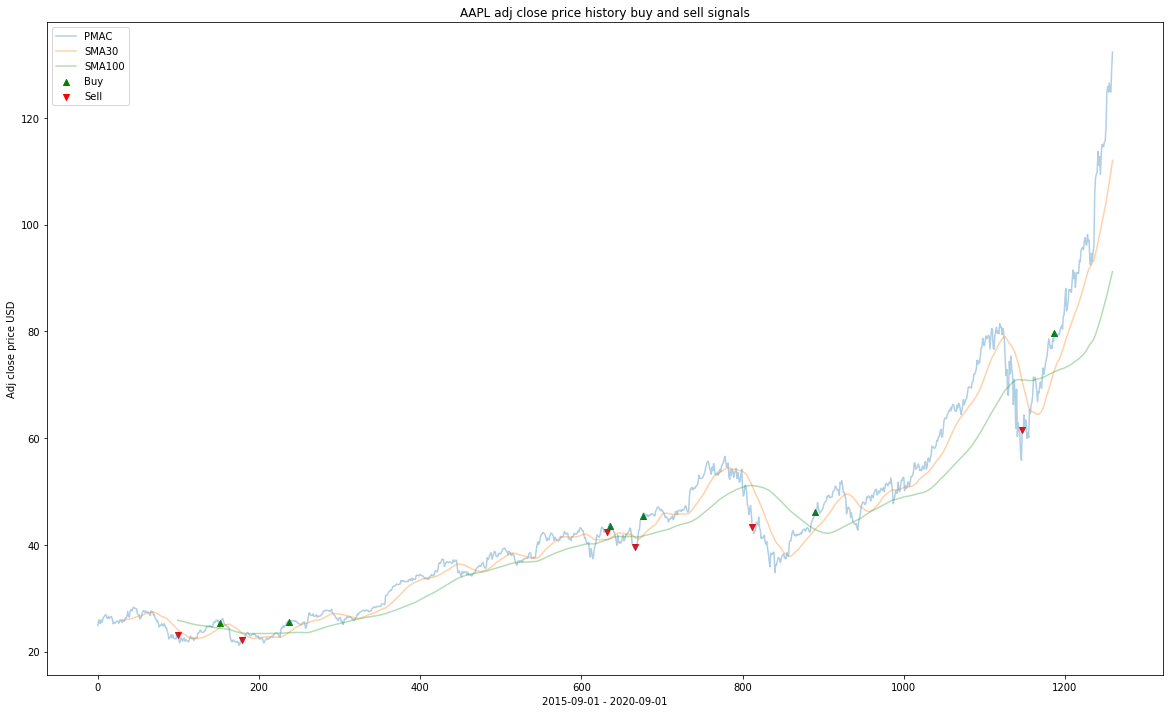

            buy_signal_price  sell_signal_price
Date                                           
2016-01-25               NaN          23.071817
2016-04-08         25.347818                NaN
2016-05-18               NaN          22.192921
2016-08-10         25.484562                NaN
2018-03-07               NaN          42.353111
2018-03-13         43.548473                NaN
2018-04-25               NaN          39.599415
2018-05-09         45.336678                NaN
2018-11-20               NaN          43.291397
2019-03-18         46.189163                NaN
2020-03-24               NaN          61.442596
2020-05-20         79.663872                NaN


In [13]:
chart('AAPL')

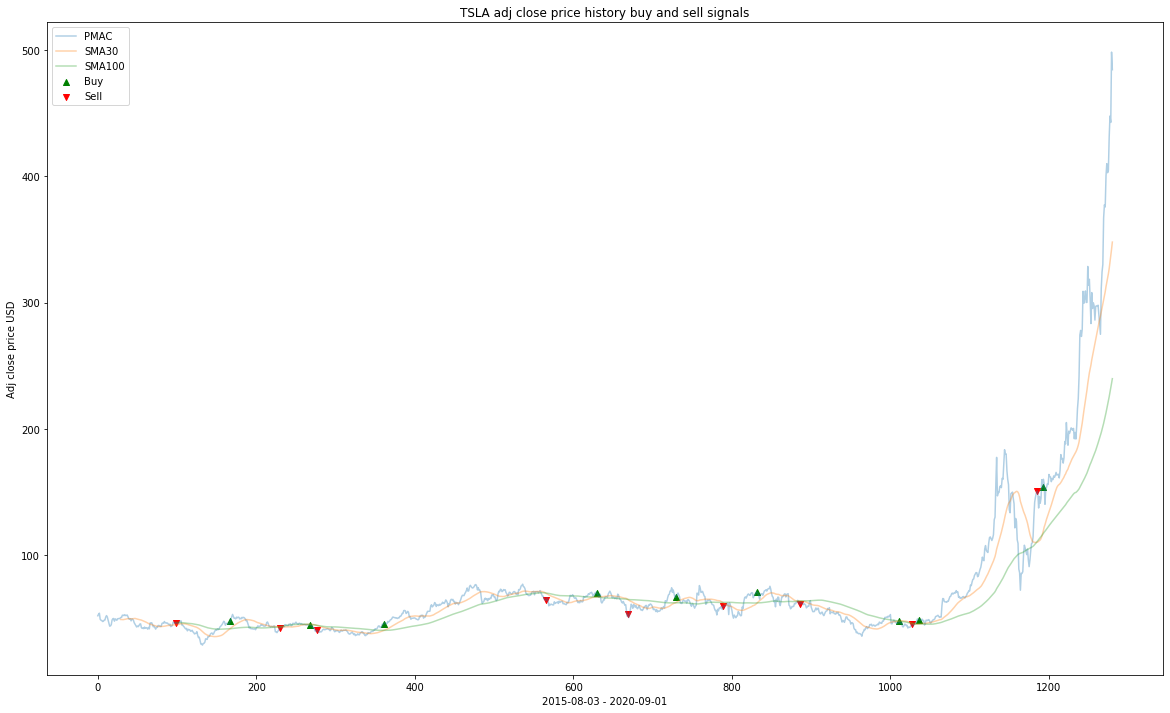

            buy_signal_price  sell_signal_price
Date                                           
2015-12-22               NaN          45.990002
2016-04-01         47.518002                NaN
2016-06-30               NaN          42.456001
2016-08-24         44.523998                NaN
2016-09-06               NaN          40.566002
2017-01-06         45.801998                NaN
2017-10-27               NaN          64.174004
2018-02-01         69.849998                NaN
2018-03-29               NaN          53.226002
2018-06-25         66.601997                NaN
2018-09-19               NaN          59.804001
2018-11-19         70.694000                NaN
2019-02-08               NaN          61.160000
2019-08-08         47.660000                NaN
2019-08-30               NaN          45.122002
2019-09-13         49.040001                NaN
2020-04-17               NaN         150.778000
2020-04-28        153.824005                NaN


In [14]:
chart('TSLA')

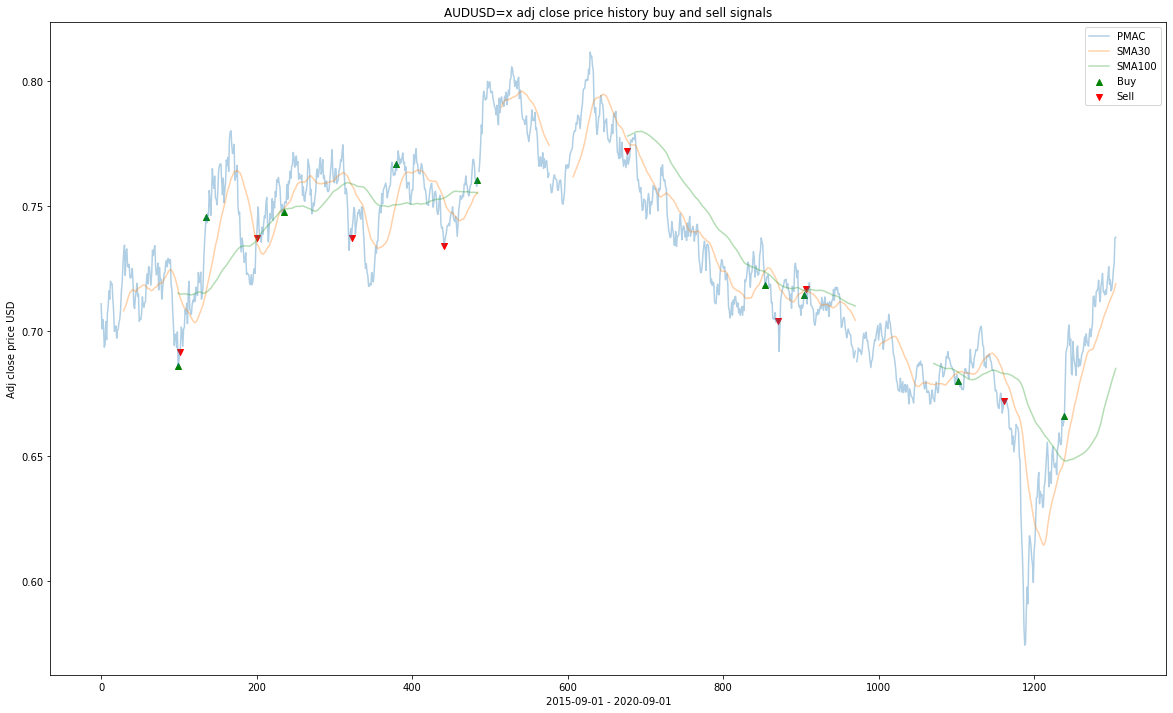

            buy_signal_price  sell_signal_price
Date                                           
2016-01-18          0.686106                NaN
2016-01-20               NaN           0.691706
2016-03-08          0.745823                NaN
2016-06-07               NaN           0.737354
2016-07-26          0.747608                NaN
2016-11-24               NaN           0.737463
2017-02-13          0.767012                NaN
2017-05-10               NaN           0.734241
2017-07-10          0.760514                NaN
2018-04-05               NaN           0.771998
2018-12-10          0.718494                NaN
2019-01-01               NaN           0.704176
2019-02-18          0.714541                NaN
2019-02-21               NaN           0.717000
2019-11-21          0.679897                NaN
2020-02-12               NaN           0.672102
2020-06-01          0.665978                NaN


In [19]:
chart('AUDUSD=x')

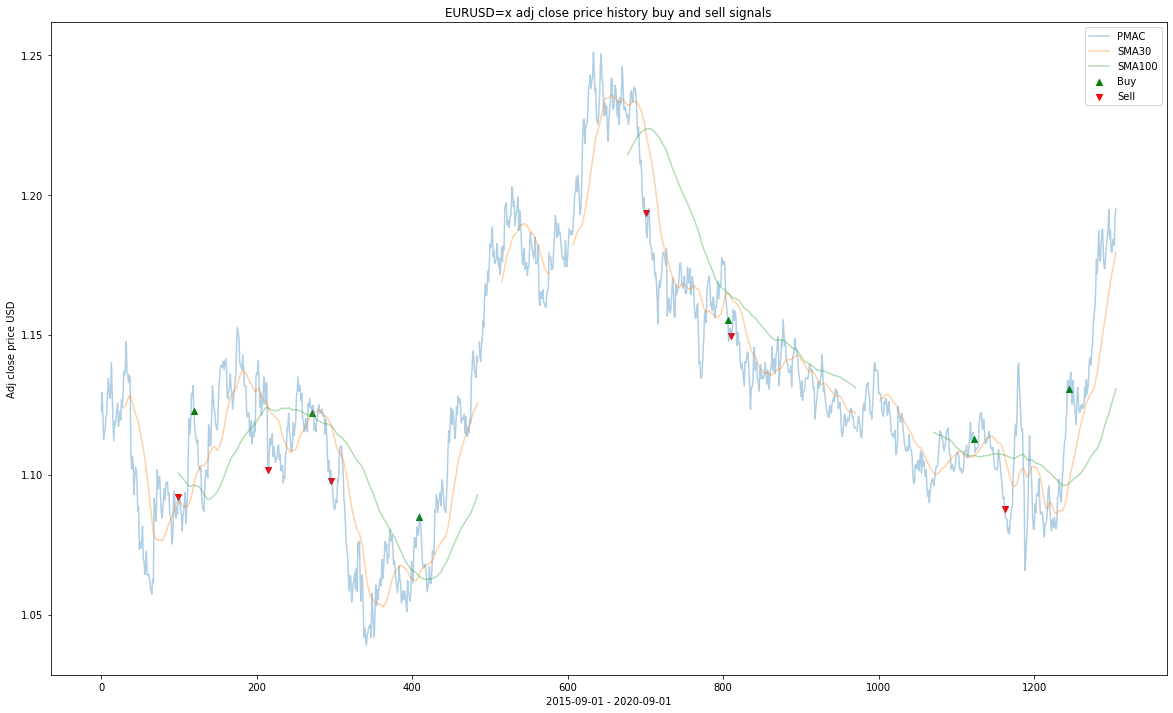

            buy_signal_price  sell_signal_price
Date                                           
2016-01-18               NaN           1.092001
2016-02-15          1.122599                NaN
2016-06-28               NaN           1.101503
2016-09-14          1.121869                NaN
2016-10-19               NaN           1.097695
2017-03-27          1.084952                NaN
2018-05-08               NaN           1.193374
2018-10-03          1.155175                NaN
2018-10-09               NaN           1.149412
2019-12-20          1.112595                NaN
2020-02-13               NaN           1.087595
2020-06-09          1.130557                NaN


In [20]:
chart('EURUSD=x')

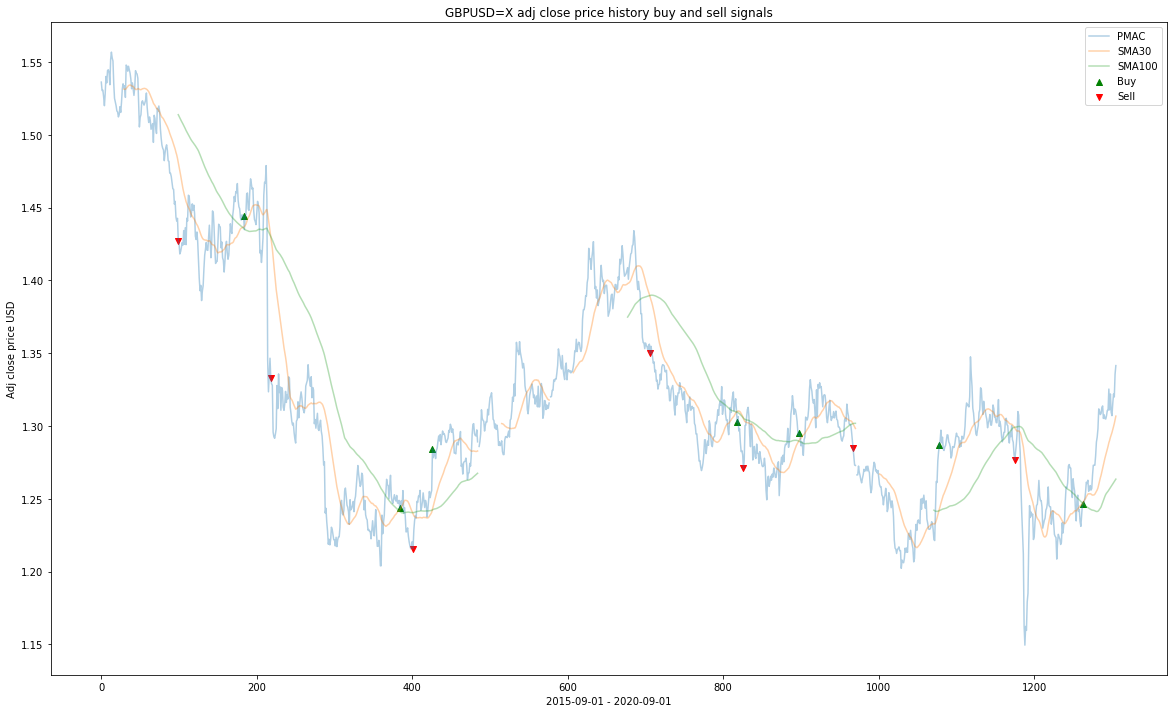

            buy_signal_price  sell_signal_price
Date                                           
2016-01-18               NaN           1.427409
2016-05-13          1.444523                NaN
2016-07-01               NaN           1.332871
2017-02-20          1.243394                NaN
2017-03-15               NaN           1.215746
2017-04-19          1.284456                NaN
2018-05-16               NaN           1.350020
2018-10-19          1.302423                NaN
2018-10-31               NaN           1.270890
2019-02-08          1.294917                NaN
2019-05-16               NaN           1.284752
2019-10-18          1.286860                NaN
2020-03-03               NaN           1.276715
2020-07-03          1.246640                NaN


In [21]:
chart('GBPUSD=X')

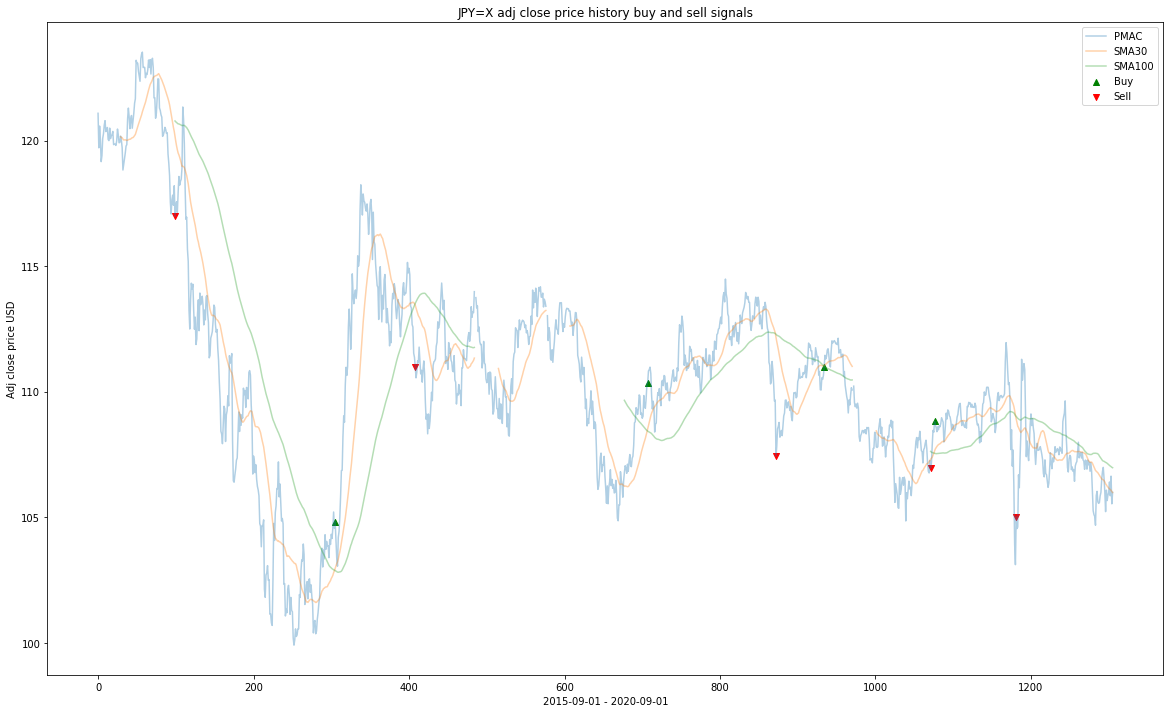

            buy_signal_price  sell_signal_price
Date                                           
2016-01-18               NaN         116.989998
2016-11-01        104.820000                NaN
2017-03-24               NaN         111.003998
2018-05-17        110.359001                NaN
2019-01-03               NaN         107.441002
2019-04-01        110.995003                NaN
2019-10-09               NaN         106.960999
2019-10-16        108.817001                NaN
2020-03-11               NaN         105.026001


In [22]:
chart('JPY=X')